<a href="https://colab.research.google.com/github/realover82/080228_scratch_affin/blob/master/kamp_Untitled37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/deeplearning/Dataset_revolve/data/g1_sensor1.csv

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# group 1의 데이터를 사용할 경우, 아래 코드를 실행합니다.
sensor1 = pd.read_csv('/content/drive/MyDrive/deeplearning/Dataset_revolve/data/g1_sensor1.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor2 = pd.read_csv('/content/drive/MyDrive/deeplearning/Dataset_revolve/data/g1_sensor2.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor3 = pd.read_csv('/content/drive/MyDrive/deeplearning/Dataset_revolve/data/g1_sensor3.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor4 = pd.read_csv('/content/drive/MyDrive/deeplearning/Dataset_revolve/data/g1_sensor4.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])

In [4]:
sensor1

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874
...,...,...,...,...,...
190213,139.996768,-1.156354,-2.696750,0.844491,-2.109427
190214,139.997504,-0.930666,-1.380241,0.919720,-2.222270
190215,139.998240,-0.554521,-2.132532,0.731647,-2.109427
190216,139.998976,-1.419655,-2.433448,1.183022,-3.087405


In [5]:
print('sensor 1의 데이터 크기', sensor1.shape)
print('sensor 2의 데이터 크기', sensor2.shape)
print('sensor 3의 데이터 크기', sensor3.shape)
print('sensor 4의 데이터 크기', sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 2의 데이터 크기 (184211, 5)
sensor 3의 데이터 크기 (196079, 5)
sensor 4의 데이터 크기 (183969, 5)


In [10]:
from scipy import interpolate
x_new = np.arange(0, 140, 0.001)
y_new1 = []; y_new2 = []; y_new3 = []; y_new4 = []
for item in ['normal', 'type1', 'type2', 'type3']:
 f_linear1 = interpolate.interp1d(sensor1['time'], sensor1[item], kind='linear'); y_new1.append(f_linear1(x_new))
 f_linear2 = interpolate.interp1d(sensor2['time'], sensor2[item], kind='linear'); y_new2.append(f_linear2(x_new))
 f_linear3 = interpolate.interp1d(sensor3['time'], sensor3[item], kind='linear'); y_new3.append(f_linear3(x_new))
 f_linear4 = interpolate.interp1d(sensor4['time'], sensor4[item], kind='linear'); y_new4.append(f_linear4(x_new))

sensor1 = pd.DataFrame(np.array(y_new1).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor2 = pd.DataFrame(np.array(y_new2).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor3 = pd.DataFrame(np.array(y_new3).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor4 = pd.DataFrame(np.array(y_new4).T, columns = ['normal', 'type1', 'type2', 'type3'])

In [ ]:
# def interpolate_item(sensor, item):
#     f_linear = interpolate.interp1d(sensor['time'], sensor[item], kind='linear')
#     return f_linear(x_new)

# y_new1 = []
# for item in ['normal', 'type1', 'type2', 'type3']:
#     y_new1.append(interpolate_item(sensor1, item))

# y_new2, y_new3, y_new4 = zip(*[interpolate_item(sensor, item) for sensor, item in zip([sensor2, sensor3, sensor4], ['normal', 'type1', 'type2', 'type3'])]))


In [11]:
sensor1


,normal,type1,type2,type3
0,-0.853307,-3.464579,0.555219,3.919664
1,-0.524588,-2.260096,-0.153734,3.713601
2,-0.003708,-1.193805,-0.197890,2.698827
3,-0.297674,-0.490986,-0.972668,1.338978
4,-0.091203,0.790771,-0.913384,0.701167
...,...,...,...,...
139995,-1.057411,-1.389236,0.664186,-1.498190
139996,-0.513635,-1.368793,1.050553,-0.982626
139997,-1.085213,-2.281763,0.868204,-2.144997
139998,-0.677177,-1.887220,0.792975,-2.146224


In [12]:
normal_ = pd.concat([sensor1['normal'], sensor2['normal'], sensor3['normal'],
sensor4['normal']], axis=1)
type1_ = pd.concat([sensor1['type1'], sensor2['type1'], sensor3['type1'],
sensor4['type1']], axis=1)
type2_ = pd.concat([sensor1['type2'], sensor2['type2'], sensor3['type2'],
sensor4['type2']], axis=1)
type3_ = pd.concat([sensor1['type3'], sensor2['type3'], sensor3['type3'],
sensor4['type3']], axis=1)
normal_.columns = ['s1', 's2', 's3', 's4']; type1_.columns = ['s1', 's2', 's3', 's4']
type2_.columns = ['s1', 's2', 's3', 's4']; type3_.columns = ['s1', 's2', 's3', 's4']

In [13]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.524588,-0.029477,-0.149817,-0.659694
2,-0.003708,-0.004751,0.280889,-0.857345
3,-0.297674,0.009673,-0.303281,-0.685318
4,-0.091203,0.096215,-0.320263,-0.303108
...,...,...,...,...
139995,-1.057411,0.587429,0.275044,0.289837
139996,-0.513635,-0.137874,-0.045973,0.131462
139997,-1.085213,0.002242,-0.164593,-0.087380
139998,-0.677177,-0.308897,0.288252,1.319862


In [14]:
print('sensor 1의 데이터 크기', normal_.shape)
print('sensor 2의 데이터 크기', type1_.shape)
print('sensor 3의 데이터 크기', type2_.shape)
print('sensor 4의 데이터 크기', type3_.shape)

sensor 1의 데이터 크기 (140000, 4)
sensor 2의 데이터 크기 (140000, 4)
sensor 3의 데이터 크기 (140000, 4)
sensor 4의 데이터 크기 (140000, 4)


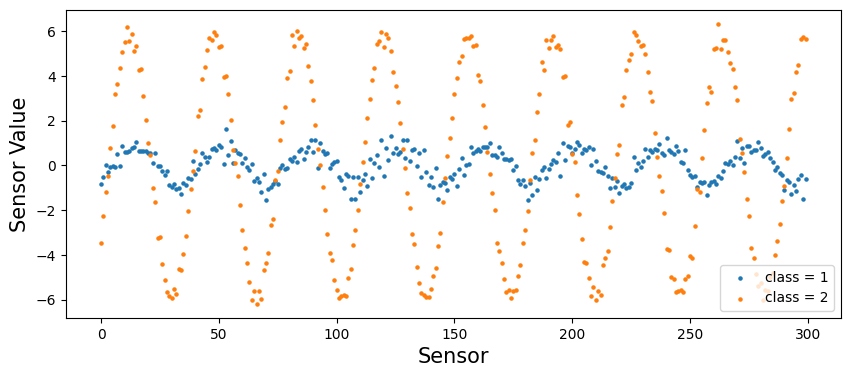

In [16]:
#  실행되지 않는 경우, 아래 코드는 주석처리하고 넘어가도 괜찮습니다. (데이터 확인용)
plt.figure(figsize = (10, 4))
plt.scatter(range(0,300), normal_['s1'][:300], label="class = "+str(1), marker='o', s=5)
plt.scatter(range(0,300), type1_['s1'][:300], label="class = "+str(2), marker='o', s=5)

plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.show()
plt.close()

In [19]:
# df.corr()
normal_.corr()

,s1,s2,s3,s4
s1,1.000000,-0.007093,0.004297,-0.003377
s2,-0.007093,1.000000,-0.002992,0.111121
s3,0.004297,-0.002992,1.000000,-0.006434
s4,-0.003377,0.111121,-0.006434,1.000000


<Axes: >

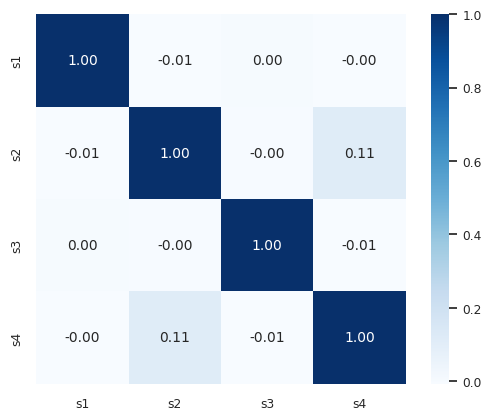

In [20]:
# 실행되지 않는 경우, 아래 코드는 주석처리하고 넘어가도 괜찮습니다. (데이터 확인용)
names = ['s1','s2','s3','s4']
cm = np.corrcoef(normal_[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=names, xticklabels=names, cmap=plt.cm.Blues)

- 이러한 상관관계 분석을 통해 비교하려는 두 센서 사이의 선형 상관관계의 여부를
확인할 수 있다. 본 가이드북에서는 일반적으로 이용되는 피어슨 상관계수로(–1, 1)
의 값을 갖는다. 값이 1에 가까울수록 센서 간의 선형관계가 강하다고 볼 수 있으며,
양수일 경우 정(+)의 상관관계를 음수일 경우 부(-)의 상관관계를 나타낸다. 절대값
이 0.6보다 클 수록 강한 상관관계를 가지며, 0.3보다 작을수록 약한 상관관계를 갖
는다. 만일 두 센서 사이에 비선형 상관관계가 있다면 이를 통해서는 확인하기 어렵
지만, 선형적인 상관관계는 정량적으로 확인 할 수 있다.

In [22]:
M =15
normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M; normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M; normal_s2 = normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M; normal_s3 = normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M; normal_s4 = normal_s4.reshape(len(normal_s4),1)
type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M; type1_s1 = type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M; type1_s2 = type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M; type1_s3 = type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M; type1_s4 = type1_s4.reshape(len(type1_s4),1)
type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M; type2_s1 = type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M; type2_s2 = type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M; type2_s3 = type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M; type2_s4 = type2_s4.reshape(len(type2_s4),1)
type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M; type3_s1 = type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M; type3_s2 = type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M; type3_s3 = type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M; type3_s4 = type3_s4.reshape(len(type3_s4),1)
normal_temp = np.concatenate((normal_s1,normal_s2,normal_s3,normal_s4), axis =1)
type1_temp = np.concatenate((type1_s1,type1_s2,type1_s3,type1_s4), axis =1)
type2_temp = np.concatenate((type2_s1,type2_s2,type2_s3,type2_s4), axis =1)
type3_temp = np.concatenate((type3_s1,type3_s2,type3_s3,type3_s4), axis =1)

np.convolve() : 1차원 신호를 입력으로 받아, 최근 M개의 측정값들의 평균을 구한
다. 일반적으로 신호 데이터의 변동이 빠른 경우에는 M값을 작게 주고, 신호 데이터
의 변동이 느린 경우에는 M값을 크게 준다.
• np.concatenate() : 1차원 필터링이므로 센서별로 나눠서 필터링한 데이터를 다시
하나로 합쳐주는 과정이다.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(normal_)
normal = scaler.transform(normal_temp)
type1 = scaler.transform(type1_temp)
type2 = scaler.transform(type2_temp)
type3 = scaler.transform(type3_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


④-3. 데이터 정규화(MinMaxScaler())
- 센서 값들은 다양한 범위의 값을 갖는다. 이렇듯 데이터의 feature scale의 차이
가 심한 경우, AI 분석 모델 훈련 성능에 안 좋은 영향을 미칠 수 있다. 본 가이드북
에서는 데이터 정규화를 위해 min-max normalization을 구현한 함수(sklearn.
preprocessing-MinMaxScaler())를 사용하였다. (자세한 설명은 [분석 모델 소개전처리]에서 확인할 수 있음)
- MinMaxScaler.fit : normal(정상 상태) data의 min, max를 구한다.
• MinMaxScaler.transform : type 1~3(고장유형) 데이터를 normal(정상 상태)
data의 min, max 값으로 정규화한다.

[단계 ⑤] 데이터 분배(학습 / 검증 / 테스트)
⑤-1. 전처리한 데이터 확인(2차 가공 데이터셋)
- 선형보간, 필터링, 정규화를 완료한 데이터셋을 확인한다. 데이터가 (0, 1)로 정규화
된 것을 확인할 수 있으며, (140000, 4) 사이즈의 데이터가 줄어든 것을 확인할 수
있는데 이는 이동평균필터를 사용한 영향이다. 이동평균 필터의 M값을 15을 사용
한 경우 정확한 평균 값처리를 위해 앞선 15개의 데이터로 평균을 구하므로 최종적
으로는 최초의 9개의 데이터는 평균 계산을 위해서만 사용된다. 따라서 데이터의
raws는 140,000-(15-1) = 139,986 이 된다.

In [24]:
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.57598822 0.50553898 0.56439491 0.44551164]
 [0.60960317 0.50513674 0.58169332 0.44848001]
 [0.62990663 0.5047345  0.59547186 0.46260474]
 ...
 [0.51874981 0.50106998 0.60999194 0.50715712]
 [0.49713039 0.51588928 0.6074125  0.53093987]
 [0.45708747 0.52025039 0.60349765 0.53976513]]
------------------------------------------------
normal data size =  (139986, 4)


- 본 가이드북에서는 숫자 확인의 효율성을 위해 데이터의 사이즈를(100000, 4)로 조
정하였다. 특히 정상 상태(steady state)의 데이터를 AI 분석 모델 학습에 이용하기
위해, rotor testbed 가동 후 몇 초간(약 30초)의 데이터를 탈락시키고 이후 데이터
를 사용한다.

In [25]:
normal = normal[30000:130000][:]
type1 = type1[30000:130000][:]
type2 = type2[30000:130000][:]
type3 = type3[30000:130000][:]
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.42588581 0.56360116 0.59076635 0.45259554]
 [0.39980512 0.54859132 0.57699856 0.4486034 ]
 [0.38031149 0.54190146 0.57998374 0.44726771]
 ...
 [0.48028648 0.53048363 0.62114742 0.51024851]
 [0.44818273 0.53444251 0.62103995 0.49126006]
 [0.42832757 0.5501298  0.60917718 0.47827626]]
------------------------------------------------
normal data size =  (100000, 4)


⑤-2. 데이터 분배
- 데이터 분배(학습 / 검증 / 테스트)

In [27]:
# 데이터 분배
normal_train = normal[:][:60000]; normal_valid = normal[:][60000:80000]; normal_test = normal[:][80000:]
type1_train = type1[:][:60000]; type1_valid = type1[:][60000:80000]; type1_test = type1[:][80000:]
type2_train = type2[:][:60000]; type2_valid = type2[:][60000:80000]; type2_test = type2[:][80000:]
type3_train = type3[:][:60000]; type3_valid = type3[:][60000:80000]; type3_test = type3[:][80000:]
train = np.concatenate((normal_train,type1_train,type2_train,type3_train))
valid = np.concatenate((normal_valid,type1_valid,type2_valid,type3_valid))
test = np.concatenate((normal_test,type1_test,type2_test,type3_test))
print("train data의 형태:", train.shape)
print("valid data의 형태:", valid.shape)
print(" test data의 형태:", test.shape)

train data의 형태: (240000, 4)
valid data의 형태: (80000, 4)
 test data의 형태: (80000, 4)


- Normal, type 1~3 abnormal data를 1:1:1:1의 비율로 각각 training data,
validation data, test data로 분배한다. 그 결과(학습 : 검증 : 테스트 = 6 : 2 : 2)
이다. [그림 27]은 데이터의 분배 결과를 시각화한 차트이다.

⑤-3. 데이터 라벨링(np.concatenate())
- 본 가이드북에서는 지도학습을 통해 3가지 신경망을 훈련시킨다. 따라서 각 유형별
데이터에 순서대로 [표 14]와 같은 라벨을 부여한다. python은 0부터 시작하는 프로
그래밍 언어이므로 0부터 순서대로 회전기계의 상태를 나타낼 수 있도록 라벨링 하
였다.

In [28]:
train_label = np.concatenate((np.full((60000,1),0), np.full((60000,1),1),
np.full((60000,1),2), np.full((60000,1),3)))
valid_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1),
np.full((20000,1),2), np.full((20000,1),3)))
test_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1),
np.full((20000,1),2), np.full((20000,1),3)))

- 데이터 뒤섞기(np.random.shuffle()) : AI 분석 모델이 데이터를 학습하는 과정에
서 데이터의 순서에 의존하지 않고 임의의 데이터가 입력되는 것으로 간주하기 위
해 라벨이 부여된 데이터를 뒤섞는다(shuffling).

In [29]:
idx = np.arange(train.shape[0]); np.random.shuffle(idx);
train = train[:][idx]; train_label = train_label[:][idx]
idx_v = np.arange(valid.shape[0]); np.random.shuffle(idx_v);
valid = valid[:][idx_v]; valid_label = valid_label[:][idx_v]
idx_t = np.arange(test.shape[0]); np.random.shuffle(idx_t);
test = test[:][idx_t]; test_label = test_label[:][idx_t]

⑤-4. 데이터 형태 변환(torch.from_numpy().float())
- 본 가이드북에서 사용하는 AI 분석 모델은 pytorch의 머신러닝 모듈이다. pytorch
의 경우 tensor 형태의 데이터를 입력으로 받기 때문에, 데이터의 형태를(torch.
from_numpy().float()) 함수를 사용하여 array에서 tensor 형태로 변환한다.

In [30]:
x_train = torch.from_numpy(train).float()
y_train = torch.from_numpy(train_label).float().T[0]
x_valid = torch.from_numpy(valid).float()
y_valid = torch.from_numpy(valid_label).float().T[0]
x_test = torch.from_numpy(test).float()
y_test = torch.from_numpy(test_label).float().T[0]
print("변경 전")
train

변경 전


array([[0.67059474, 0.47829448, 0.62725701, 0.46725424],
       [0.68601505, 0.43011832, 0.62242385, 0.48898709],
       [0.6915675 , 0.51036652, 0.58355496, 0.5053535 ],
       ...,
       [0.86279247, 0.70178416, 0.56113655, 0.62633987],
       [0.09676623, 0.7248878 , 0.6103093 , 0.45393779],
       [0.94087354, 0.68871052, 0.60475232, 0.52911915]])

In [31]:
print("변경 후")
x_train

변경 후


tensor([[0.6706, 0.4783, 0.6273, 0.4673],
        [0.6860, 0.4301, 0.6224, 0.4890],
        [0.6916, 0.5104, 0.5836, 0.5054],
        ...,
        [0.8628, 0.7018, 0.5611, 0.6263],
        [0.0968, 0.7249, 0.6103, 0.4539],
        [0.9409, 0.6887, 0.6048, 0.5291]])

미니배치학습이나 데이터 셔플

In [33]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
train = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train, batch_size =5000, shuffle=True)
valid = TensorDataset(x_valid, y_valid)
valid_dataloader = DataLoader(valid, batch_size =len(x_valid), shuffle=False)
test = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test, batch_size =len(x_valid), shuffle=False)

• TensorDataset : 데이터 x_data와 레이블 y_data를 묶어 놓는 컨테이너이다.
• DataLoader : TensorDataset의 결과가 전달되는데, 이를 통해 batch size나 데이
터를 섞을지 여부 등을 결정해 준다.
• training data의 경우 학습을 위해 batch size를 5000으로, 학습을 반복할 때마다
데이터를 다시 섞어주기 위해 shuffle을 사용하였다.
• validation and test data의 경우 학습의 검증과 평가에 사용되므로 따로 batch size
지정하지 않았으며, shuffle 역시 단계 [⑤-3]에서 이미 섞어주었으므로 사용하지 않
았다.
본 가이드북에서는 총 3개의 AI 모델을 이용하여 회전기계의 고장유형 AI데이터셋을
분석한다. [단계 ①~⑤]는 AI 분석 모델의 학습과 평가에 이용할 수 있도록 데이터를
전처리하는 과정이었다면, [단계 ⑥]에서는 앞선 단계에서 구축한 데이터가 공통적으
로 적용되는 3개의 AI 모델을 설계한다. 이후 [단계 ⑦]에서 [단계 ⑥] AI 모델을 훈련
(학습) 시킨다. [단계 ⑧]에서는 [단계 ⑦]에서 훈련된 AI 모델을 평가하고, 결과를 분석
한다. 아래는 코드에서 3개의 AI 모델을 구분하기 위한 색을 표시하였다.

공통
심층신경망(DNN)
합성곱신경망(CNN)
순환신경망(RNN)

[단계 ⑥] AI 모델 구축
⑥-1. 심층신경망(DNN)
- 심층신경망(DNN)은 인공신경망에서 모델 내 은닉층을 많이 늘려서 학습의 결과를
향상시키는 방법이다. 라벨이 있는 데이터의 지도학습 분류(classification), 회귀
(regression) 문제에서 주로 사용된다.

In [35]:
# layer를 더 늘리고 싶은 경우 주석을 제거하고 사용합니다.
class KAMP_DNN(nn.Module):
 def __init__(self):
    super(KAMP_DNN, self).__init__()
    self.layer1 = nn.Linear(in_features =4, out_features =100)
    self.layer2 = nn.Linear(in_features =100, out_features =100)
    self.layer3 = nn.Linear(in_features =100, out_features =100)
    self.layer4 = nn.Linear(in_features =100, out_features =4)

    self.dropout = nn.Dropout(0.2)
    self.relu = nn.ReLU()

 def forward(self, input):
    out =self.layer1(input)
    out =self.relu(out)
    out =self.dropout(out)

    out =self.layer2(out)
    out =self.relu(out)
    out =self.dropout(out)

    out =self.layer3(out)
    out =self.relu(out)
    out =self.dropout(out)

    out =self.layer4(out)
    return out

model_check = KAMP_DNN()
print(model_check)

KAMP_DNN(
  (layer1): Linear(in_features=4, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)


1. KAMP_ ss는 nn.Module class를 상속한다.
2. __init__()에서는 신경망 layer를 초기화한다.
● nn.Linear() : 선형계층으로 weight와 bias을 사용하여 입력에 선형 변환을 적용하는 모듈
◦in_features : 신경망으로 입력되는 size
◦out_features : 신경망에서 출력되는 size
42 「회전기계 고장유형 AI 데이터셋」 분석실습 가이드북
● nn.ReLU() : ReLU 활성화함수 계층으로 비선형 활성화를 통해 모델의 입력과 출력 사이에 복
잡한 관계(mapping)를 만든다.
◦ 비선형 활성화는 nn.Linear로 이루어진 선형계층에 비선형성을 도입하여 신경망이 보다 복잡
한 현상을 학습할 수 있도록 돕는다.
● nn.Dropout() : 드롭아웃 계층으로 신경망 일부를 의도적으로 학습에서 제외함으로써 모델을
일반화하는 역할을 한다. (과적합 방지; [그림 28] 참고)

● input_size = 4 : 계측되는 sensor 값들 4개
● ouput_size = 4 : 정상 + 고장유형 개수 4개
● 본 가이드북에서 은닉층의 뉴런수를 100으로 하였으나, data에 따라 조절
● layer의 개수는 데이터에 따라 조절(여기서는 2~4개의 layer 사용)
3. forward()에서는 초기화된 layer에 입력 데이터를 전달하고 최종 출력을 얻는다.

⑥-2. 합성곱신경망(CNN)
- 합성곱신경망(CNN)은 인공신경망의 한 종류이며, 주로 Matrix 데이터나 이미지 데
이터에서의 특징 추출에 쓰인다.

In [37]:
# layer를 더 늘리고 싶은 경우 주석을 제거하고 사용합니다.
class KAMP_CNN(nn.Module):
 def __init__(self):
  super(KAMP_CNN, self).__init__()
  self.conv1 = nn.Sequential(
  nn.Conv1d(in_channels=1, out_channels=100, kernel_size=2, stride=1, padding='same'),
  nn.BatchNorm1d(100),
  nn.ReLU(),
  nn.MaxPool1d(kernel_size=1, stride=1),
  nn.Dropout(p=0.2))

# self.conv2 = nn.Sequential(
# nn.Conv1d(in_channels=100, out_channels=100, kernel_size=2, stride=1, padding='same'),
# nn.BatchNorm1d(100),
# nn.ReLU(),
# nn.MaxPool1d(kernel_size=1, stride=1),
# nn.Dropout(p=0.2))

# self.conv3 = nn.Sequential(
# nn.Conv1d(in_channels=100, out_channels=100, kernel_size=2, stride=1, padding='same'),
# nn.BatchNorm1d(100),
# nn.ReLU(),
# nn.MaxPool1d(kernel_size=1, stride=1),
# nn.Dropout(p=0.2))

  self.conv4 = nn.Sequential(
  nn.Conv1d(in_channels=100, out_channels=4, kernel_size=2, stride=1, padding='same'),
  nn.BatchNorm1d(4),
  nn.ReLU(),
  nn.MaxPool1d(kernel_size=1, stride=1))

  self.final_pool = nn.AdaptiveAvgPool1d(1)
  self.linear = nn.Linear(4, 4)
 def forward(self, input):
  input = input.unsqueeze(1)
  out =self.conv1(input)
# out = self.conv2(out)
# out = self.conv3(out)
  out =self.conv4(out)
  out =self.final_pool(out)
  out =self.linear(out.squeeze(-1))
  return out
model_check = KAMP_CNN()
print(model_check)

KAMP_CNN(
  (conv1): Sequential(
    (0): Conv1d(1, 100, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv1d(100, 4, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (final_pool): AdaptiveAvgPool1d(output_size=1)
  (linear): Linear(in_features=4, out_features=4, bias=True)
)


1. KAMP_CNN을 구현하는 class는 nn.Module class를 상속한다.
2. __init__()에서는 신경망 layer를 초기화한다.
● nn.Sequential() : 계층이 순차적으로 실행되도록 담는 sequential container로서 연산순서를
원하는 데로 다음 계층으로 전달할 수 있다.
◦ in_features : 신경망으로 입력되는 size
◦ out_features : 신경망에서 출력되는 size
● nn.Conv1d() : 1차원 합성곱 계층으로서 주로 자연어와 같은 시계열 데이터에 많이 사용된다.
◦ 이미지처리에서 주로 사용되는 2차원 합성곱 계층은 filter가 가로와 세로로 이동하면서 연산
한다. 반면, 1차원 합성곱 계층의 연산은 filter가 가로로만 이동하면서 output을 계산한다.
([그림 29] 참고)

◦ input shape : torch.nn.conv1d()의 입력 사이즈는 [Batch size, Input channel size,
sequence length]이다. 데이터를 학습하는 방식에 따라 입력 사이즈를 조절할 수 있으며, 본
가이드북에서 사용한 사이즈는 다음과 같다.
[Batch size = 80000, Input channel size = 1, sequence length = 4]

◦ in_channels : 신경망으로 입력되는 데이터의 channel size(컬러 이미지의 경우 첫 계층에
서 RGB = 3을 사용)
◦ out_channels : 신경망에서 출력되는 데이터의 channel size(본 가이드북에서는 100을 사
용하였으나 parameter study로 조절)
◦ kernel_size : 특징을 추출하는 filter의 size
◦ stride : kernel(filter)이 적용될 때, 이동하는 step size(2 이상인 경우, 데이터 size가 줄어
든다)
◦ padding : 데이터 가장자리에 0 을 채 워 넣 는 역할(디폴트는 valid)
{'vaild' : No padding, 'same' : Zero-padding, 혹은 다른 값}
◦ bias : bias term의 사용 여부(디폴트는 True)
● nn.BatchNorm1d() : Batch 차원의 정규화 계층으로 학습의 안정화에 기여한다.
● nn.ReLU() : ReLU 활성화함수 계층으로 비선형 활성화를 통해 모델의 입력과 출력 사이에 복
잡한 관계(mapping)를 만든다.
◦ 비선형 활성화는 nn.Linear로 이루어진 선형계층에 비선형성을 도입하여 신경망이 보다 복잡
한 현상을 학습할 수 있도록 돕는다.
● nn.MaxPool1d() : sub-sampling 계층으로 데이터의 특징을 보존하면서 크기를 줄여주는 역
할을 한다(과적합 방지).
● nn.Dropout() : 드롭아웃 계층으로 신경망의 일부를 의도적으로 학습에서 제외함으로써 모델을
일반화하는 역할을 한다(과적합 방지).
● layer의 개수는 데이터에 따라 조절(여기서는 2~4개의 layer 사용)
3. forward()에서는 초기화된 layer에 입력 데이터를 전달하고 최종 출력을 얻는다.
- [그림 31]은 본 가이드북에서 사용한 kernel과 stride size가 합성곱 신경망에서 어
떻게 작용하는지 시각적으로 확인하기 위한 예시를 나타내었다. (편의를 위해 out_
channels = 4)

In [38]:
print('--------------------------------------------------------------------')
input = torch.tensor([[[0.0, 6.0, 9.0, 1.0]]])
print('"input is same below."')
print(input)
print('--------------------------------------------------------------------')
model = nn.Conv1d(1, 4, 2, bias =False)
model.weight.data = torch.zeros(model.weight.data.size())
model.weight.data[:, :, :2] =1
print('"kernal is same below."')
print(model.weight.data)
print('--------------------------------------------------------------------')
output = model(input)
print('"output is same below (without bias)."')
print(output)
print('--------------------------------------------------------------------')
model1 = nn.Conv1d(1, 4, 2)
model1.weight.data = torch.zeros(model1.weight.data.size())
model1.weight.data[:, :, :2] =1
output = model1(input)
print('"output is same below (with bias)."')
print(output)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
"input is same below."
tensor([[[0., 6., 9., 1.]]])
--------------------------------------------------------------------
"kernal is same below."
tensor([[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]])
--------------------------------------------------------------------
"output is same below (without bias)."
tensor([[[ 6., 15., 10.],
         [ 6., 15., 10.],
         [ 6., 15., 10.],
         [ 6., 15., 10.]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------
"output is same below (with bias)."
tensor([[[ 6.2589, 15.2589, 10.2589],
         [ 5.3402, 14.3402,  9.3402],
         [ 5.4469, 14.4469,  9.4469],
         [ 5.5272, 14.5272,  9.5272]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------


⑥-3. 순환신경망(RNN)
[그림 32] RNN, LSTM, GRU 특징
- 순환신경망(RNN, LSTM, GRU)은 과거의 학습을 가중치를 통해 현재 학습에 반영
하는 특징이 있다. 따라서 순차적으로 변화하는 시계열(time series) 데이터의 학습
에 탁월한 효과를 갖는다. 본 가이드북에서는 pytorch의 LSTM 모듈을 사용하였다.
([그림 32] 참고)

In [39]:
import torch
import torch.nn as nn
class KAMP_RNN(nn.Module):
 def __init__(self):
  super(KAMP_RNN, self).__init__()
  self.lstm = nn.LSTM(input_size =4, hidden_size =100, num_layers =2,
batch_first=True, dropout =0.2)
  self.fc = nn.Linear(in_features =100, out_features =4)
 def forward(self, input):
  input = input.unsqueeze(1)
  out, _ =self.lstm(input)
  out = out.view(-1,100)
  output =self.fc(out)
  return output

model_check = KAMP_RNN()
print(model_check)

KAMP_RNN(
  (lstm): LSTM(4, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=4, bias=True)
)


1. KAMP_DNN을 구현하는 class는 nn.Module class를 상속한다.
2. __init__()에서는 신경망 layer를 초기화한다.
● nn.LSTM() : LSTM 순환신경망 계층(Long Short-Term Memory Network)으로서 주로 시
계열 데이터 처리에 많이 사용된다.
◦ input shape : torch.nn.LSTM의 입력 사이즈는 [Batch size, sequence length, input
size]이며, 데이터를 학습시키는 방식에 따라 입력 사이즈를 조절할 수 있으며, 본 가이드북의
입력 사이즈는 다음과 같다.
input shape = [Batch size = 80000, sequence length = 1, input size = 4]

● input size : 신경망으로 입력되는 데이터의 특징 개수(time step 아님)
◦ hidden size : 은닉층에서 사용할 특징 개수(적절한 값 사용)
◦ batch_first : [batch, sequence, feature]로 input data 사용(디폴트는 False, [sequence,
batch, feature])
◦ num_layers : LSTM layer 개수 조절 옵션(여기서는 4개의 layer 사용)
◦ dropout : 드롭아웃 옵션(과적합 방지, 디폴트는 0)
● nn.Linear() : 선형계층으로 weight와 bias을 사용하여 입력에 선형 변환을 적용하는 모듈로,
여기서는 LSTM의 fully connected layer로 사용하였다.
◦ in_features : 신경망으로 입력되는 size
◦ out_features : 신경망에서 출력되는 size
3. forward()에서는 초기화된 layer에 입력 데이터를 전달하고 최종 출력을 얻는다.

[단계 ⑦] AI 모델 학습
⑦-0. 모델 학습 코드(공통)
[단계 ⑥]에서 구축한 3개의 AI 모델을 학습시키기 위한 공통 code는 다음과 같으며,
‘모델 학습, 모델 검증, 학습 과정 시각화’의 3가지로 구성된다.

In [40]:
def train_model(model, criterion, optimizer, num_epoch, train_dataloader, PATH):
 loss_values = []
 loss_values_v = []
 check =0; accuracy_past =0
 for epoch in range(1, num_epochs +1):
  #---------------------- 모델 학습 ---------------------#
  model.train()
  batch_number =0
  running_loss =0.0
  for batch_idx, samples in enumerate(train_dataloader):
    x_train, y_train = samples
    # 변수 초기화
    optimizer.zero_grad()
    y_hat = model.forward(x_train)
    loss = criterion(y_hat,y_train.long())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    batch_number +=1
    loss_values.append(running_loss / batch_number)
 #---------------------- 모델 검증 ---------------------#
 model.eval()
 accuracy =0.0
 total =0.0
 for batch_idx, data in enumerate(valid_dataloader):
  x_valid, y_valid = data

  v_hat = model.forward(x_valid)
  v_loss = criterion(v_hat,y_valid.long())
  _, predicted = torch.max(v_hat.data, 1)
  total += y_valid.size(0)
  accuracy += (predicted == y_valid).sum().item()
 loss_values_v.append(loss.item())
 accuracy = (accuracy / total)
 #----------------Check for early stopping---------------#
 if epoch % 1 ==0:
  print('[Epoch {}/{}] [Train_Loss: {:.6f} /Valid_Loss: {:.6f}]'.format(epoch,num_epochs, loss.item(),v_loss.item()))
  print('[Epoch {}/{}] [Accuracy : {:.6f}]'.format(epoch, num_epochs,accuracy))
 if accuracy_past > accuracy:
  check +=1
 else:
  check =0
  accuracy_past = accuracy
 if check >50:
  print('This is time to do early stopping')
 torch.save(model, PATH +'model.pt')
 return loss_values, loss_values_v

- train_model()의 입력 데이터
● model : [단계 ⑥]에서 구축한 DNN, CNN, RNN 모델
● criterion : loss 계산을 위한 함수(nn.CrossEntropyLoss())
◦ label이 존재하는 supervised learning에서 기계학습 모델은 예측값(y_hat)이 실제값(label)
50 「회전기계 고장유형 AI 데이터셋」 분석실습 가이드북
에 가까워지도록 학습이 이루어진다. 이때 예측값과 실제값이 얼마나 차이가 나는지를 나타내
는 지표로 loss를 사용한다.
◦ pytorch에서 제공하는 loss 함수([표 15] 참고)
nn.MSELoss - mean squared error로 loss를 계산하는 함수
- 주로 회귀 문제에 사용되며, 분류 문제에서도 사용
nn.CrossEntropyLoss - 이진, 다중 분류(classification) 문제를 다룰 때 사용
- nn.SoftMax와 nn.CrossEntropyLoss의 기능을 동시에 제공
nn.BCELoss - 이진 분류 문제에 주로 사용
nn.BCEWithLogitsLoss - nn.Sigmoid와 nn.BCELoss의 기능을 동시에 제공
- 두 함수를 각각 사용하는 것보다는 nn.BCEWithLogitsLoss를 사용하는 것이 안정적
nn.NLLLoss - 분류 문제에서 특정 가중치를 사용해 데이터의 불균형을 처리할 때 사용
[표 15] pytorch에서 제공하는 loss 함수
◦ 본 가이드북에서 사용한 nn.CrossEntropyLoss()은 회전기계 고장유형 AI데이터 셋과 같은
다중 분류 문제를 다룰 때 유용하다.
● optimizer : 최적화 함수(torch.optim.Adam(model.parameters()))
◦ 기계학습에서 네트워크 오차(loss)를 줄이고 알고리즘의 정확도를 높이기 위해 모델의 가중치
를 변화시켜주는 역할을 한다.
◦ pytorch에서 제공하는 optimizer 함수([표 16] 참고)
torch.optim.SGD - loss의 미분값을 이용하여, 기울기를 따라 내려가면서 가중치를 업데이트하는
방법
torch.optim.AdaGrad - 학습률의 감소(learning rate decay)를 통해 학습률에 따른 학습 효율 및 정확도
문제를 해결하는 방법
torch.optim.RMSprop
- AdaGrad에서 더 나아가 기울기를 단순 누적하지 않고, 지수 가중 이동평균
(Exponentially weighted moving average)을 이용하여 최신 기울기를 더 많
이 반영하도록 하는 방법
torch.optim.Adam - SGD + momentum와 RMSprop의 기능을 합친 최적화 함수로 gradient를 효
율적으로 조절(보편적으로 많이 사용됨)
[표 16] pytorch에서 제공하는 optimizer 함수
◦ 본 가이드북에서 사용한 torch.optim.Adam()은 SGD, momentum, RMSprop optimizer
의 기능들을 합친 최적화 함수로 학습 방향과 스텝 사이즈를 자동으로 맞춰주기 때문에 처음
모델을 구축할 때 사용하면 좋다.
● num_epoch : 전체 데이터의 반복 학습 횟수
51 「회전기계 고장유형 AI 데이터셋」 분석실습 가이드북
● train_dataloader : [단계 ⑤]에서 구축한 전처리가 완료된 데이터
● PATH : 학습 결과가 저장되는 위치
- train_model()의 출력 데이터
● loss_values : 학습 과정 확인을 위한 학습 손실 값 history
● loss_values_v : 학습 과정 확인을 위한 검증 손실 값 history
- 전체 프로세스는 입력한 반복 학습 횟수(epoch)만큼 진행되며 매 epoch마다 모델
을 검증한다. 또한, 과적합 문제와 학습 효율성을 위해 학습의 중단지점을 구축해야
한다. 따라서 가장 높았던 검증 정확도(accuracy_past)를 기준으로 정확도가 정해
진 epoch 동안 향상되지 않으면 반복 학습을 중단하라는 메시지를 출력하도록 하
였다. 메시지만 출력하도록 한 이유는 초기에 AI 분석 모델이 구축되면 최대 반복
횟수까지 학습을 진행하면서 학습 추이를 확인하고 loss plot으로부터 중단지점을
설정하기 위함이다.

In [41]:
def train_model(model, criterion, optimizer, num_epoch, train_dataloader, PATH):
 loss_values = []
 loss_values_v = []
 check =0; accuracy_past =0
 for epoch in range(1, num_epochs +1):
 #---------------------- 모델 학습 ---------------------#
  model.train()
  batch_number =0
  running_loss =0.0
  for batch_idx, samples in enumerate(train_dataloader):
    x_train, y_train = samples

    optimizer.zero_grad()
    y_hat = model.forward(x_train)
    loss = criterion(y_hat,y_train.long())
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    batch_number +=1
 loss_values.append(running_loss / batch_number)
 #------------------------------------------------------#

● model.train() : training 과정에서 사용해야 하는 layer들을 알아서 사용하도록 하는 함수이다.
● train_dataloader : 학습데이터는 배치를 나누어 사용하게 되며, enumerate() 함수를 통해
batch index(batch_idx)와 해당 데이터(samples)를 동시에 사용한다. 그 결과 학습에 사용되
는 데이터는 각 배치별(x_train, y_train)이다.
52 「회전기계 고장유형 AI 데이터셋」 분석실습 가이드북
● optimizer.zero_grad() : 가중치 변수 초기화 함수로, pytorch는 backward 과정에서,
gradients값들을 계속 더해주기 때문에 back propagation을 하기 전에 gradients를 zero로
만드는 변수 초기화를 해야 한다.
● y_hat = model.forward(x_train) : 학습 데이터를 AI 분석 모델에 입력하여 예측값(y_hat)을
구한다.
● loss = criterion(y_hat,y_train.long()) : AI 분석 모델의 예측값(y_hat)과 실제 라벨값(y_train)
사이의 차이인 loss 값을 계산한다.
● loss.backward() : loss의 역전파를 위한 함수, 모델의 파라미터와 관련된 loss의 gradients를
계산한다.
● optimizer.step() : 신경망의 가중치를 업데이트한다.
● loss_values.append(running_loss / batch_number) : training loss 값을 저장한다

In [44]:
model.eval()

Conv1d(1, 4, kernel_size=(2,), stride=(1,), bias=False)

In [47]:
accuracy =0.0
total =0.0

In [49]:
data

[tensor([[ 0.9687,  0.6922,  0.5665,  0.5728],
         [ 0.6774,  0.5171,  0.6007,  0.4609],
         [-0.0076,  0.4702,  0.6172,  0.5868],
         ...,
         [ 0.8451,  0.5073,  0.6023,  0.5620],
         [ 0.1339,  0.3839,  0.5847,  0.4916],
         [ 0.7692,  0.4118,  0.6140,  0.5804]]),
 tensor([3., 0., 3.,  ..., 3., 3., 1.])]

In [50]:
valid_dataloader

In [51]:
batch_idx

0

In [52]:
 x_valid.shape, y_valid.shape, v_hat.shape

NameError: ignored

In [48]:
#---------------------- 모델 검증 ---------------------#
#  model.eval()
# accuracy =0.0
# total =0.0
for batch_idx, data in enumerate(valid_dataloader):
  x_valid, y_valid = data

  v_hat = model.forward(x_valid)
  v_loss = criterion(v_hat,y_valid.long())
  _, predicted = torch.max(v_hat.data, 1)
  total += y_valid.size(0)
  accuracy += (predicted == y_valid).sum().item()
# loss_values_v.append(loss.item())
# accuracy = (accuracy / total)
 #------------------------------------------------------#

RuntimeError: ignored

In [87]:
def train_model(model, criterion, optimizer, num_epoch, train_dataloader, PATH):
    loss_values = []
    loss_values_v = []
    check =0; accuracy_past =0
    for epoch in range(1, num_epochs +1):
 #---------------------- 모델 학습 ---------------------#
        model.train()
        batch_number =0
        running_loss =0.0
        for batch_idx, samples in enumerate(train_dataloader):
            x_train, y_train = samples

            optimizer.zero_grad()
            y_hat = model.forward(x_train)
            loss = criterion(y_hat,y_train.long())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batch_number +=1
        loss_values.append(running_loss / batch_number)
 #------------------------------------------------------#
 #---------------------- 모델 검증 ---------------------#
        model.eval()
        accuracy =0.0
        total =0.0
        for batch_idx, data in enumerate(valid_dataloader):
            x_valid, y_valid = data

            v_hat = model.forward(x_valid)
            v_loss = criterion(v_hat,y_valid.long())
            _, predicted = torch.max(v_hat.data, 1)
            total += y_valid.size(0)
            accuracy += (predicted == y_valid).sum().item()
        loss_values_v.append(loss.item())
        accuracy = (accuracy / total)
 #------------------------------------------------------#
  #----------------Check for early stopping---------------#
        if epoch % 1 ==0:
            print('[Epoch {}/{}] [Train_Loss: {:.6f} /Valid_Loss: {:.6f}]'.format(epoch,num_epochs, loss.item(),v_loss.item()))
            print('[Epoch {}/{}] [Accuracy : {:.6f}]'.format(epoch, num_epochs,accuracy))

        if accuracy_past > accuracy:
            check +=1
        else:
            check =0
            accuracy_past = accuracy

        if check >50:
            print('This is time to do early stopping')

    torch.save(model, PATH +'model.pt')
    return loss_values, loss_values_v

● 매 epoch마다 training loss, validation loss, validation accuracy를 출력한다. 학습이 진행
됨에 따라 정확도가 이전 정확도보다 향상되지 않으면 학습 중단(early stopping) 지점을 알려
준다. (본 가이드북에서는 50 사용)
● torch.save(model, PATH + 'model.pt') : 학습 결과를 PATH 위치에 저장

⑦-1. 심층신경망(DNN) 모델 학습

In [57]:
PATH

NameError: ignored

In [86]:
DNN_model = KAMP_DNN()
num_epochs =10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(DNN_model.parameters())
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/DNN/'
DNN_loss_values, DNN_loss_values_v = train_model(DNN_model, criterion, optimizer, num_epochs, train_dataloader, PATH)

[Epoch 1/10] [Train_Loss: 1.180363 /Valid_Loss: 1.133188]
[Epoch 1/10] [Accuracy : 0.438350]
[Epoch 2/10] [Train_Loss: 0.937805 /Valid_Loss: 0.897436]
[Epoch 2/10] [Accuracy : 0.487988]
[Epoch 3/10] [Train_Loss: 0.880777 /Valid_Loss: 0.852768]
[Epoch 3/10] [Accuracy : 0.489988]
[Epoch 4/10] [Train_Loss: 0.865529 /Valid_Loss: 0.843968]
[Epoch 4/10] [Accuracy : 0.502550]
[Epoch 5/10] [Train_Loss: 0.861780 /Valid_Loss: 0.831530]
[Epoch 5/10] [Accuracy : 0.529525]
[Epoch 6/10] [Train_Loss: 0.830811 /Valid_Loss: 0.811637]
[Epoch 6/10] [Accuracy : 0.563237]
[Epoch 7/10] [Train_Loss: 0.801352 /Valid_Loss: 0.778514]
[Epoch 7/10] [Accuracy : 0.595500]
[Epoch 8/10] [Train_Loss: 0.775356 /Valid_Loss: 0.745961]
[Epoch 8/10] [Accuracy : 0.621912]
[Epoch 9/10] [Train_Loss: 0.756908 /Valid_Loss: 0.720295]
[Epoch 9/10] [Accuracy : 0.642100]
[Epoch 10/10] [Train_Loss: 0.731327 /Valid_Loss: 0.711625]
[Epoch 10/10] [Accuracy : 0.646763]


In [61]:
num_epochs

1000

● DNN_model = KAMP_DNN() : 학습을 위해 심층신경망 모델 정의한다.
● num_epochs = 1000 : 학습의 반복 횟수 설정한다.
● criterion = nn.CrossEntropyLoss() : AI 분석 모델 학습을 위한 손실함수로 분류
(Classification)에 주로 사용되는 nn.CrossEntropyLoss 사용한다.
● optimizer = torch.optim.Adam(DNN_model.parameters()) : SGD+momentum 과
RMSprop optimizer의 기능을 모두 갖춘 Adam optimizer 사용하였으며, 이 경우 따로
Learning rate의 설정은 불필요하다.
● PATH = 'save/DNN/' : 학습이 완료된 후 ‘model.pt’ 데이터가 저장되는 위치
● DNN_loss_values, DNN_loss_values_v = train_model(DNN_model, criterion,
optimizer, num_epochs, train_dataloader, PATH) : 심층신경망 모델의 학습을 진행하고,
손실그래프를 그리기 위한 training loss와 validation loss를 변수로 저장한다.

⑦-2. 합성곱신경망(CNN) 모델 학습

In [92]:
CNN_model = KAMP_CNN()
num_epochs =10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters())
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/CNN/'
CNN_loss_values, CNN_loss_values_v = train_model(CNN_model, criterion, optimizer, num_epochs, train_dataloader, PATH)

[Epoch 1/10] [Train_Loss: 1.294675 /Valid_Loss: 1.306050]
[Epoch 1/10] [Accuracy : 0.396975]
[Epoch 2/10] [Train_Loss: 1.241536 /Valid_Loss: 1.231047]
[Epoch 2/10] [Accuracy : 0.444113]
[Epoch 3/10] [Train_Loss: 1.182991 /Valid_Loss: 1.179583]
[Epoch 3/10] [Accuracy : 0.461512]
[Epoch 4/10] [Train_Loss: 1.138363 /Valid_Loss: 1.123455]
[Epoch 4/10] [Accuracy : 0.466087]
[Epoch 5/10] [Train_Loss: 1.094546 /Valid_Loss: 1.079866]
[Epoch 5/10] [Accuracy : 0.478388]
[Epoch 6/10] [Train_Loss: 1.051097 /Valid_Loss: 1.043377]
[Epoch 6/10] [Accuracy : 0.487638]
[Epoch 7/10] [Train_Loss: 1.025182 /Valid_Loss: 1.010355]
[Epoch 7/10] [Accuracy : 0.496262]
[Epoch 8/10] [Train_Loss: 0.987983 /Valid_Loss: 0.988616]
[Epoch 8/10] [Accuracy : 0.500950]
[Epoch 9/10] [Train_Loss: 0.972412 /Valid_Loss: 0.961495]
[Epoch 9/10] [Accuracy : 0.520900]
[Epoch 10/10] [Train_Loss: 0.947619 /Valid_Loss: 0.936956]
[Epoch 10/10] [Accuracy : 0.541763]


⑦-3. 순환신경망(RNN) 모델 학습

In [91]:
RNN_model = KAMP_RNN()
num_epochs =10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(RNN_model.parameters())
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/RNN/'
RNN_loss_values, RNN_loss_values_v = train_model(RNN_model, criterion, optimizer, num_epochs, train_dataloader, PATH)

[Epoch 1/10] [Train_Loss: 1.386188 /Valid_Loss: 1.386331]
[Epoch 1/10] [Accuracy : 0.250000]
[Epoch 2/10] [Train_Loss: 1.386152 /Valid_Loss: 1.386196]
[Epoch 2/10] [Accuracy : 0.327500]
[Epoch 3/10] [Train_Loss: 1.385295 /Valid_Loss: 1.385119]
[Epoch 3/10] [Accuracy : 0.321487]
[Epoch 4/10] [Train_Loss: 1.326654 /Valid_Loss: 1.321613]
[Epoch 4/10] [Accuracy : 0.400587]
[Epoch 5/10] [Train_Loss: 1.097997 /Valid_Loss: 1.089849]
[Epoch 5/10] [Accuracy : 0.433762]
[Epoch 6/10] [Train_Loss: 1.096524 /Valid_Loss: 1.086599]
[Epoch 6/10] [Accuracy : 0.447837]
[Epoch 7/10] [Train_Loss: 1.082828 /Valid_Loss: 1.084762]
[Epoch 7/10] [Accuracy : 0.447650]
[Epoch 8/10] [Train_Loss: 1.088967 /Valid_Loss: 1.082140]
[Epoch 8/10] [Accuracy : 0.450750]
[Epoch 9/10] [Train_Loss: 1.098532 /Valid_Loss: 1.080452]
[Epoch 9/10] [Accuracy : 0.448037]
[Epoch 10/10] [Train_Loss: 1.096070 /Valid_Loss: 1.078383]
[Epoch 10/10] [Accuracy : 0.444738]


[단계 ⑧] AI 모델 평가
⑧-0. 모델 평가 코드(공통)
학습이 완료된 AI 모델의 평가를 위한 공통 code는 다음과 같다.
- 모델 평가

In [68]:
def test_model(model, PATH):
 model = torch.load(PATH +'model.pt')
 #---------------------- 모델 시험 ---------------------#
 model.eval()
 total =0.0
 accuracy =0.0
 for batch_idx, data in enumerate(test_dataloader):
  x_test, y_test = data

  t_hat = model(x_test)
  _, predicted = torch.max(t_hat.data, 1)
  total += y_test.size(0)
  accuracy += (predicted == y_test).sum().item()
 accuracy = (accuracy / total)
 #------------------------------------------------------#
 print(accuracy)

● 입력 : 평가를 진행할 AI 분석 모델, 모델 학습 결과가 저장된 위치(PATH)를 입력한다.
● 진행 : test data를 이용하여 앞선 검증 코드와 동일한 프로세스로 진행된다.
● 출력 : test data를 이용한 모델 정확도 결과를 출력한다.

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
def draw_confusion_matrix(model, xt, yt, PATH):
  y_pred = []; y_true = []
  model.eval()
  y_hat = model(xt); output = (torch.max(torch.exp(y_hat), 1)[1]).data.cpu().numpy()
  y_pred.extend(output)
  labels = y_test.data.cpu().numpy()
  y_true.extend(labels)
  # 분류 항목
  classes = ('Normal', 'Type1', 'Type2', 'Type3')
  # Confussion Matrix 생성
  plt.figure(figsize = (7,5))
  dlen = float(len(x_test)) # test data 크기 : 여기서는 80000
  cm = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cm/dlen, index = [i for i in classes],columns = [i for i in classes])
  sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
  plt.title("Confusion Matrix", size=24, fontweight='bold')
  plt.xlabel("Predicted Label", size=16); plt.ylabel("Actual Label", size=16)
  plt.rc('xtick', labelsize=12); plt.rc('ytick', labelsize=12); plt.yticks(rotation=0)
  plt.savefig(PATH +'cm_output.png')

● 입력 : 평가를 진행할 AI 분석 모델, 평가에 사용할 test data(x_test, y_test), 모델 학습 결과가
저장된 위치(PATH)를 입력한다.
● 진행 : test data를 이용하여 AI 분석 모델이 예측한 결과와 실제 라벨값이 얼마나 일치하는지
정확도를 계산한다.
● 출력 : test data를 이용한 모델 정확도 혼동 행렬 결과를 시각화하고 이를 저장 위치(PATH)에
cm_output.png로 저장한다.

In [70]:
def plot_loss_graph(loss_values, loss_values_v):
  plt.figure()
  plt.plot(loss_values)
  plt.plot(loss_values_v)
  plt.title("Training & Validation Loss")
  plt.ylabel("loss", fontsize="large")
  plt.xlabel("epoch", fontsize="large")
  plt.legend(["train", "validation"])
  plt.tight_layout()
  # 결과 저장
  plt.savefig(PATH +'lossplot_output.png')

입력 : 학습 및 검증 loss의 history(loss_valus, loss_values_v)를 입력한다.
● 출력 : 학습 과정을 loss 값을 통해 시각화(plt.plot)하고, 이를 저장 위치(PATH)에 cm_output.
png로 저장한다.

⑧-1. 심층신경망(DNN) 모델 평가

In [72]:
DNN_model

KAMP_DNN(
  (layer1): Linear(in_features=4, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)

In [88]:
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/DNN/'
test_model(DNN_model, PATH)

0.6581375


혼동행렬

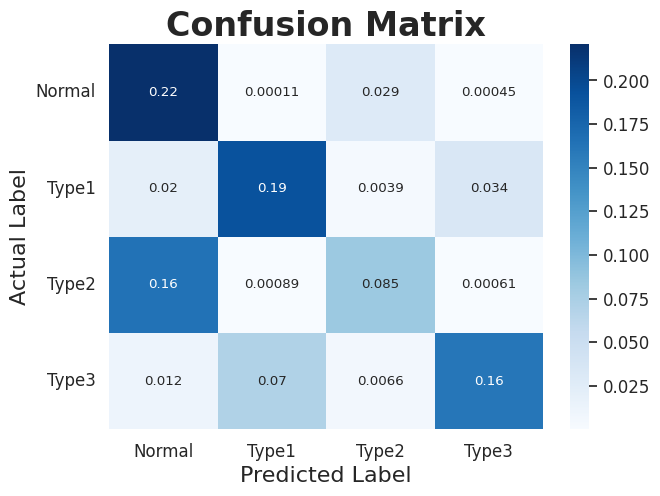

In [89]:
draw_confusion_matrix(DNN_model, x_test, y_test, PATH)

손실그래프

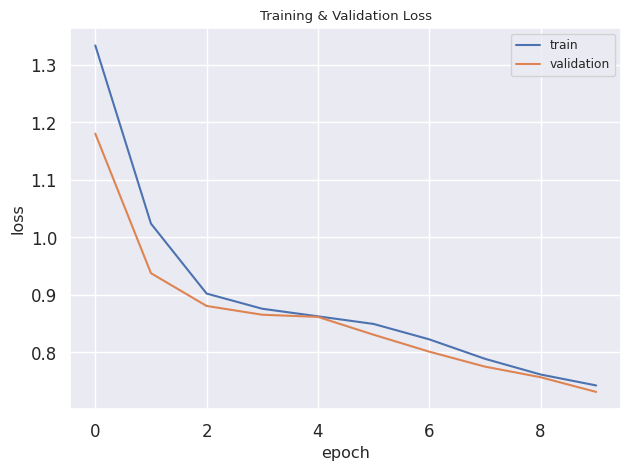

In [90]:
plot_loss_graph(DNN_loss_values, DNN_loss_values_v)

⑧-2. 합성곱신경망(CNN) 모델 평가
- 모델 평가

In [76]:
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/CNN/'
test_model(CNN_model, PATH)

0.4358625


혼동행렬

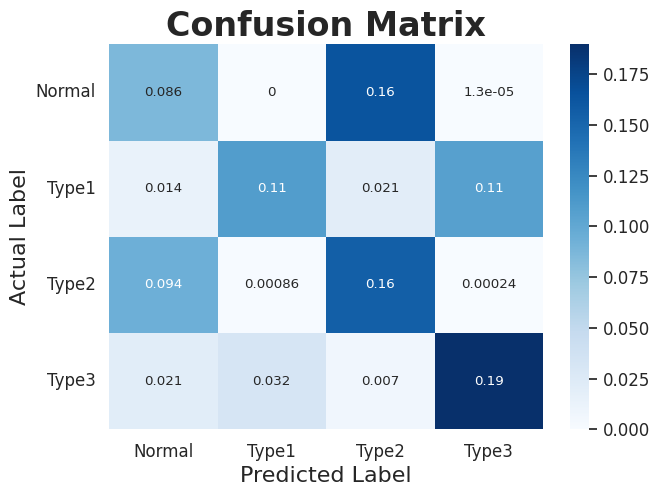

In [93]:
draw_confusion_matrix(CNN_model, x_test, y_test, PATH)

손실그래프

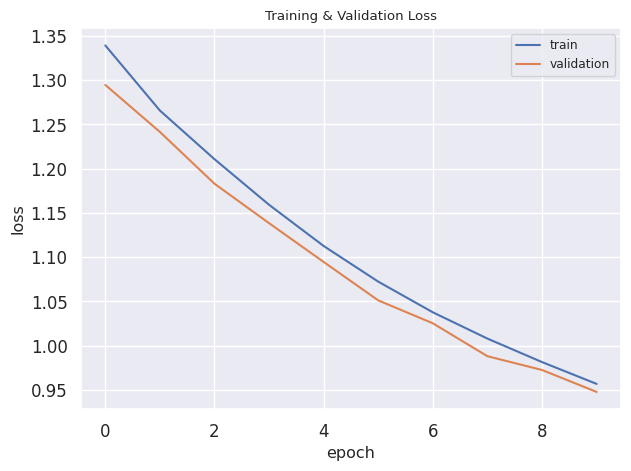

In [94]:
plot_loss_graph(CNN_loss_values, CNN_loss_values_v)

⑧-3. 순환신경망(RNN) 모델 평가
- 모델 평가

In [79]:
PATH ='/content/drive/MyDrive/deeplearning/Dataset_revolve/save/RNN/'
test_model(RNN_model, PATH)

0.25


혼동행렬

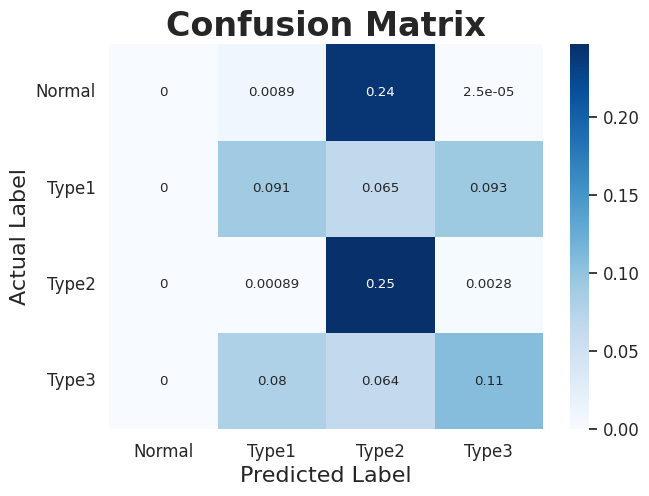

In [95]:
draw_confusion_matrix(RNN_model, x_test, y_test, PATH)

손실그래프

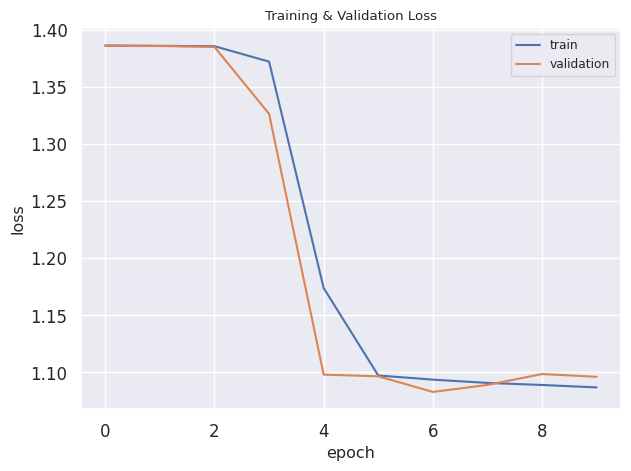

In [96]:
plot_loss_graph(RNN_loss_values, RNN_loss_values_v)